In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('C:\\jupyter\\statistic\\water.csv', usecols = [1,2,3,4])

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

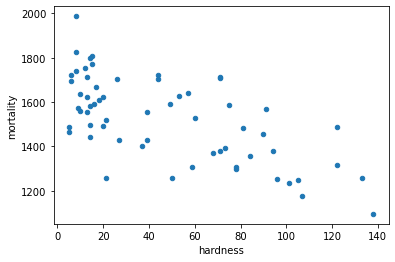

In [35]:
data.plot(kind='scatter', x = 'hardness', y = 'mortality')

In [155]:
print(f"Корреляция по Пирсону \n{data[['hardness', 'mortality']].corr()}")
print(f"Корреляция по Спирману \n{data[['hardness', 'mortality']].corr(method='spearman')}")

Корреляция по Пирсону 
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
Корреляция по Спирману 
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [173]:
X_train, X_test, y_train, y_test = train_test_split(data[['hardness']],data['mortality'], test_size = 0.30, random_state = 10)

In [174]:
model = LinearRegression()
model.fit(data[['hardness']],data['mortality'])
print(f"k = {model.coef_}, b = {model.intercept_}")

k = [-3.22609161], b = 1676.3556007011584


In [195]:
y_pred = model.predict(X_test)
result_1 = X_test.copy()
result_1['y_pred'] = y_pred
result_1['y_test'] = y_test
result_1.loc[:,'resudials'] = result_1['y_pred']-result_1['y_test']


In [196]:
print(f"Коэффициент детерминации модели = {model.score(X_test,y_test)}")

Коэффициент детерминации модели = 0.2823696715292163


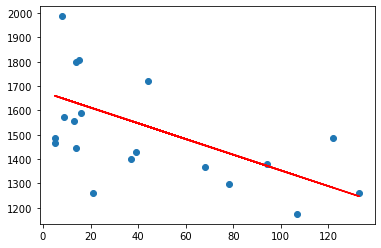

In [176]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')

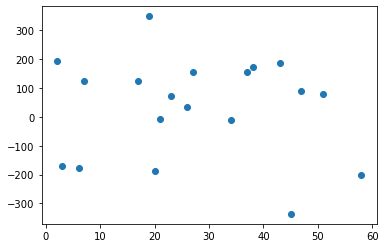

In [177]:
plt.scatter(result_1.index,result_1['resudials'])

#### Таким образом, основываясь на построенных моделях регрессии, можно сделать вывод о том, что существует обратная зависимость между средней годовой смертностью и жесткостью воды

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Для южных городов:

Корреляция по Пирсону 
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Корреляция по Спирману 
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


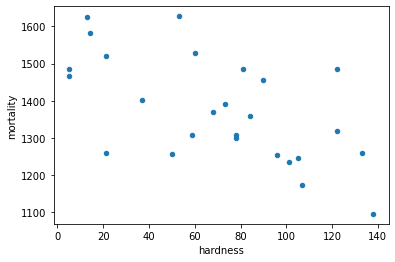

In [143]:
data_south = data[data['location'] == 'South']
data_south.plot(kind='scatter', x = 'hardness', y = 'mortality')
print(f"Корреляция по Пирсону \n{data_south[['hardness', 'mortality']].corr()}")
print(f"Корреляция по Спирману \n{data_south[['hardness', 'mortality']].corr(method='spearman')}")

In [170]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data_south[['hardness']],data_south['mortality'], \
                                                    test_size = 0.30, random_state = 10)
model_s = LinearRegression()
model_s.fit(data_south[['hardness']],data_south['mortality'])
print(f"k = {model_s.coef_}, b = {model_s.intercept_}")

k = [-2.09271845], b = 1522.8150485436895


In [179]:
y_pred_s = model_s.predict(X_test_s)
result_2 = X_test_s.copy()
result_2['y_pred'] = y_pred_s
result_2['y_test'] = y_test_s
result_2.loc[:,'resudials'] = result_2['y_pred']-result_2['y_test']
model_s.score(X_test_s,y_test_s)

0.5054593681859572

In [197]:
print(f"Коэффициент детерминации модели = {model_s.score(X_test_s,y_test_s)}")

Коэффициент детерминации модели = 0.5054593681859572


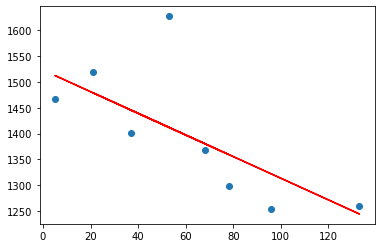

In [182]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c = 'r')

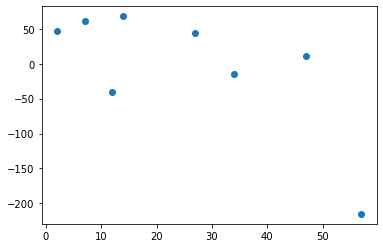

In [186]:
plt.scatter(result_2.index,result_2['resudials'])

#### Таким образом, была получена модель для южных городов. Можно сделать вывод о том, что обратная зависимость между средней годовой смертностью и жесткостью воды сохраняется.


### Для северных городов:

Корреляция по Пирсону 
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Корреляция по Спирману 
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


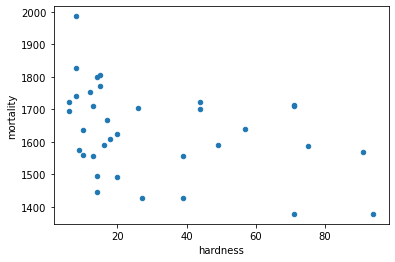

In [189]:
data_north = data[data['location'] == 'North']
data_north.plot(kind='scatter', x = 'hardness', y = 'mortality')
print(f"Корреляция по Пирсону \n{data_north[['hardness', 'mortality']].corr()}")
print(f"Корреляция по Спирману \n{data_north[['hardness', 'mortality']].corr(method='spearman')}")

In [190]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_north[['hardness']],data_north['mortality'], \
                                                    test_size = 0.30, random_state = 10)
model_n = LinearRegression()
model_n.fit(data_north[['hardness']],data_north['mortality'])
print(f"k = {model_n.coef_}, b = {model_n.intercept_}")

k = [-1.93134215], b = 1692.312801433099


In [199]:
y_pred_n = model_n.predict(X_test_n)
result_3 = X_test_n.copy()
result_3['y_pred'] = y_pred_n
result_3['y_test'] = y_test_n
result_3.loc[:,'resudials'] = result_3['y_pred']-result_3['y_test']

In [198]:
print(f"Коэффициент детерминации модели = {model_n.score(X_test_n,y_test_n)}")

Коэффициент детерминации модели = 0.05369754016246764


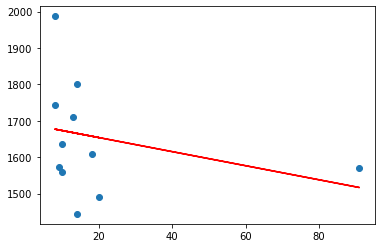

In [200]:
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c = 'r')

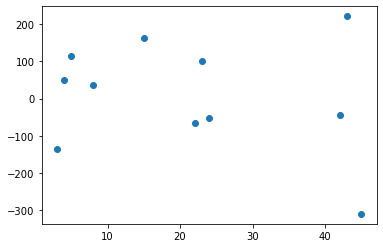

In [201]:
plt.scatter(result_3.index,result_3['resudials'])

#### Таким образом, была получена модель для северных городов. Можно сделать вывод о том, что обратная зависимость между средней годовой смертностью и жесткостью воды по предложенным данным не сохраняется (корреляции = -0.4, R2 = 0.05). По графику видно, что существует выброс одной точки (90,1600), который, вероятнее всего, препятсвует корректному построению модели.
